# Bobcat Population Analysis

In [355]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as linalg
from numpy import random as rd

# Base variables and functions
identity_matrix = np.identity(16)
default_t0_population = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])
default_number_of_years = 32

## Base Model

### Ex-situ Model

    Population  Year
0   160.000000     0
1   220.400000     1
2   207.508000     2
3   171.014240     3
4   148.864067     4
5   132.077399     5
6   116.595072     6
7   102.928307     7
8    91.022414     8
9    80.534675     9
10   71.263123    10
11   63.067398    11
12   55.819382    12
13   49.406421    13
14   43.731212    14
15   38.708517    15
16   34.263017    16
17   30.326920    17
18   26.842340    18
19   23.758182    19
20   21.028563    20
21   18.612563    21
22   16.474120    22
23   14.581371    23
24   12.906089    24
25   11.423283    25
26   10.110839    26
27    8.949185    27
28    7.920996    28
29    7.010937    29
30    6.205437    30
31    5.492482    31
32    4.861440    32


[Text(0.5, 1.0, 'Wild Bobcat Population')]

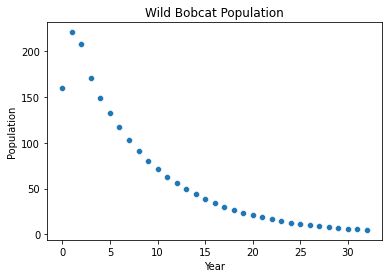

In [356]:
default_leslie_matrix = np.array([[0.32, 0.32, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01],
                         [0.38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0.38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0]])

def growth(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years):
    nth_population = np.zeros(number_of_years+1)
    nth_population[0] = np.sum(t0_population)
    nth_year = np.arange(number_of_years+1)
    for i in nth_year[1:number_of_years+1]:
        nth_population[i] =  np.sum(linalg.matrix_power(leslie_matrix, i).dot(t0_population))

    df = pd.DataFrame({
        'Population' : nth_population,
        'Year' : nth_year
        })

    print(df)

    return df

data_nth_population_ex_situ = growth()

sns.scatterplot(data = data_nth_population_ex_situ, x = "Year", y = "Population").set(title = "Wild Bobcat Population")

### In-situ Model

       Population  Year
0      160.000000     0
1      283.400000     1
2      364.551000     2
3      436.625020     3
4      533.537755     4
5      659.378462     5
6      816.476326     6
7     1011.801542     7
8     1254.810158     8
9     1556.937354     9
10    1932.309667    10
11    2398.526699    11
12    2977.476937    12
13    3696.349631    13
14    4588.910176    14
15    5697.086946    15
16    7072.962384    16
17    8780.820087    17
18   10900.820052    18
19   13532.641624    19
20   16799.935634    20
21   20856.107525    21
22   25891.603462    22
23   32142.871022    23
24   39903.448538    24
25   49537.743797    25
26   61498.146761    26
27   76346.272961    27
28   94779.334716    28
29  117662.879458    29
30  146071.432573    30
31  181338.953086    31
32  225121.471343    32


[Text(0.5, 1.0, 'In-Situ Bobcat Population')]

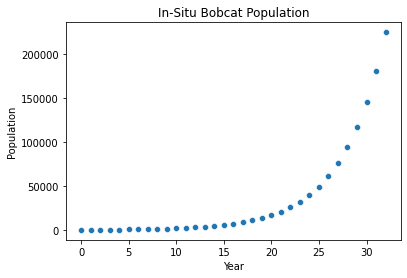

In [357]:
leslie_matrix_extended = np.array([[0.63, 0.63, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
                         [0.34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0]])

data_nth_population_in_situ = growth(leslie_matrix = leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_in_situ, x = "Year", y = "Population").set(title = "In-Situ Bobcat Population")

## Extended Model

In [358]:
default_catastrophie_matrix = np.identity(16)
for i in range(0,16):
    default_catastrophie_matrix[i][i] = 0.2

### Ex-situ Catastrophe Model

    Population  Year
0   160.000000     0
1   220.400000     1
2   207.508000     2
3   171.014240     3
4   148.864067     4
5   105.661919     5
6    93.276057     6
7    82.342646     7
8    72.817931     8
9    64.427740     9
10   45.608399    10
11   40.363135    11
12   35.724404    12
13   31.620109    13
14   27.987975    14
15   19.818761    15
16   17.542665    16
17   15.527383    17
18   13.743278    18
19   12.164189    19
20    8.613300    20
21    7.623706    21
22    6.747799    22
23    5.972530    23
24    5.286334    24
25    3.743181    25
26    3.313120    26
27    2.932469    27
28    2.595552    28
29    2.297344    29
30    1.626718    30
31    1.439821    31
32    1.274397    32


[Text(0.5, 1.0, 'Ex-situ Bobcat Population with Catastrophes')]

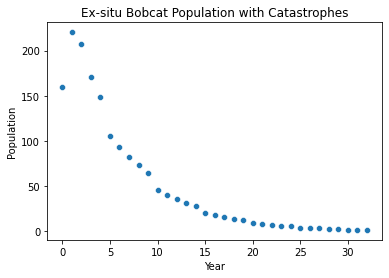

In [359]:
def growth_extended_catastrophe(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years, catastrophie_matrix = default_catastrophie_matrix):
    nth_population_extended = np.zeros(number_of_years+1)
    nth_population_extended[0] = np.sum(t0_population)
    current_population = t0_population
    nth_year = np.arange(number_of_years+1)
    for i in range(1, number_of_years+1):
        if (i % 5 == 0):
            current_population = leslie_matrix.dot(current_population)
            current_population = current_population - catastrophie_matrix.dot(current_population)
            nth_population_extended[i] = np.sum(current_population)
        else:
            current_population = leslie_matrix.dot(current_population)
            nth_population_extended[i] = np.sum(current_population)

    df = pd.DataFrame({
        'Population' : nth_population_extended,
        'Year' : nth_year
        })

    print(df)

    return df

data_nth_population_extended_ex_situ = growth_extended_catastrophe()

sns.scatterplot(data = data_nth_population_extended_ex_situ, x = "Year", y = "Population").set(title = "Ex-situ Bobcat Population with Catastrophes")

### In-situ Catastrophe Model

      Population  Year
0     160.000000     0
1     283.400000     1
2     364.551000     2
3     436.625020     3
4     533.537755     4
5     527.502769     5
6     653.181060     6
7     809.441233     7
8    1003.848126     8
9    1245.549883     9
10   1236.678187    10
11   1535.057088    11
12   1905.585239    12
13   2365.663764    13
14   2936.902513    14
15   2916.908516    15
16   3621.356741    16
17   4495.779885    17
18   5581.219867    18
19   6928.712511    19
20   6881.253636    20
21   8542.661642    21
22  10605.200778    22
23  13165.719970    23
24  16344.452521    24
25  16232.527887    25
26  20151.712731    26
27  25017.146724    27
28  31057.292400    28
29  38555.772341    29
30  38291.749620    30
31  47536.918518    31
32  59014.242984    32


[Text(0.5, 1.0, 'In-Situ Bobcat Population with Catastrophes')]

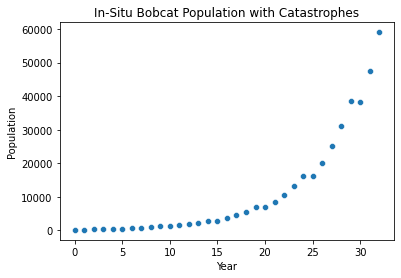

In [360]:
data_nth_population_extended_in_situ = growth_extended_catastrophe(leslie_matrix=leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_extended_in_situ, x = "Year", y = "Population").set(title = "In-Situ Bobcat Population with Catastrophes")

### Ex-situ Migration Model

    Population  Year
0   160.000000     0
1   173.354400     1
2   132.217021     2
3    94.741523     3
4    74.882629     4
5    62.966724     5
6    55.270018     6
7    50.380485     7
8    47.285875     8
9    45.318029     9
10   44.064838    10
11   43.266700    11
12   42.758249    12
13   42.434273    13
14   42.227818    14
15   42.096247    15
16   42.012396    16
17   41.958953    17
18   41.924892    18
19   41.903187    19
20   41.889355    20
21   41.880540    21
22   41.874922    22
23   41.871342    23
24   41.869061    24
25   41.867607    25
26   41.866680    26
27   41.866090    27
28   41.865713    28
29   41.865474    29
30   41.865321    30
31   41.865223    31
32   41.865161    32


[Text(0.5, 1.0, 'Ex-situ Bobcat Population with Migrations')]

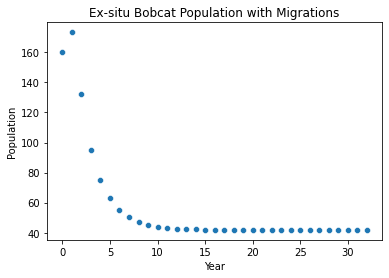

In [361]:
def growth_extended_migration(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years, catastrophie_matrix = default_catastrophie_matrix):
    nth_population_extended = np.zeros(number_of_years+1)
    nth_population_extended[0] = np.sum(t0_population)
    current_population = t0_population
    nth_year = np.arange(number_of_years+1)
    for i in range(1, number_of_years+1):
        current_population = current_population + np.array([7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        current_population = leslie_matrix.dot(current_population)
        current_population = current_population - current_population*0.2
        nth_population_extended[i] = np.sum(current_population)

    df = pd.DataFrame({
        'Population' : nth_population_extended,
        'Year' : nth_year
        })

    print(df)

    return df

data_nth_population_extended_ex_situ = growth_extended_migration()

sns.scatterplot(data = data_nth_population_extended_ex_situ, x = "Year", y = "Population").set(title = "Ex-situ Bobcat Population with Migrations")

### In-situ Migration Model

    Population  Year
0   160.000000     0
1   225.316800     1
2   230.406394     2
3   222.345913     3
4   218.736944     4
5   217.220547     5
6   216.152898     6
7   215.311520     7
8   214.648429     8
9   214.105379     9
10  213.643849    10
11  213.243161    11
12  212.891119    12
13  212.579589    13
14  212.302145    14
15  212.054385    15
16  211.833187    16
17  211.634198    17
18  211.455632    18
19  211.295990    19
20  211.153398    20
21  211.025978    21
22  210.912088    22
23  210.810292    23
24  210.719304    24
25  210.637977    25
26  210.565284    26
27  210.500309    27
28  210.442231    28
29  210.390320    29
30  210.343919    30
31  210.302445    31
32  210.265373    32


[Text(0.5, 1.0, 'In-situ Bobcat Population with Migrations')]

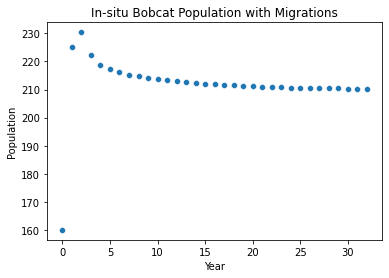

In [362]:
data_nth_population_extended_ex_situ = growth_extended_migration(leslie_matrix=leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_extended_ex_situ, x = "Year", y = "Population").set(title = "In-situ Bobcat Population with Migrations")

## Stochastic Model

In [363]:
# Seed and success values
rd.seed(0)
default_success_rate_catastrophes = 0.7 # 70% of the times, a catastrophe is successful
default_catastrophie_rate = 5 # A catastrophe happens every 5 years

### Ex-situ Catastrophe Model

    Population  Year
0   160.000000     0
1   220.400000     1
2   207.508000     2
3   171.014240     3
4   148.864067     4
5   105.661919     5
6    93.276057     6
7    82.342646     7
8    72.817931     8
9    64.427740     9
10   57.010499    10
11   50.453918    11
12   44.655506    12
13   39.525137    13
14   34.984969    14
15   24.773451    15
16   21.928331    16
17   19.409229    17
18   17.179097    18
19   15.205236    19
20   10.766624    20
21    9.529632    21
22    8.434749    22
23    7.465662    23
24    6.607917    24
25    4.678977    25
26    4.141400    26
27    3.665586    27
28    3.244440    28
29    2.871680    29
30    2.033398    30
31    1.799777    31
32    1.592997    32


[Text(0.5, 1.0, 'Ex-situ Bobcat Population with Stochastic Catastrophes')]

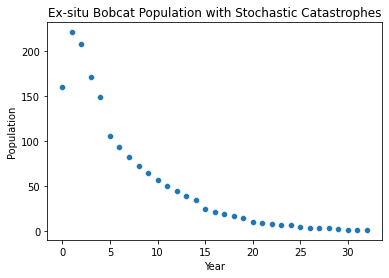

In [364]:
def growth_stochastic_catastrophe(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years, catastrophie_matrix = default_catastrophie_matrix, success_rate = default_success_rate_catastrophes, catastrophe_rate = default_catastrophie_rate):
    nth_population_stochastic = np.zeros(number_of_years+1)
    nth_population_stochastic[0] = np.sum(t0_population)
    current_population = t0_population
    nth_year = np.arange(number_of_years+1)
    for i in range(1, number_of_years+1):
        if (i % catastrophe_rate == 0):
            current_success = rd.random()
            # print(current_success) # Uncomment to see the success rates
            if (current_success < success_rate):
                current_population = leslie_matrix.dot(current_population)
                current_population = current_population - catastrophie_matrix.dot(current_population)
                nth_population_stochastic[i] = np.sum(current_population)
            else:
                current_population = leslie_matrix.dot(current_population)
                nth_population_stochastic[i] = np.sum(current_population)
                
        else:
            current_population = leslie_matrix.dot(current_population)
            nth_population_stochastic[i] = np.sum(current_population)

    df = pd.DataFrame({
        'Population' : nth_population_stochastic,
        'Year' : nth_year
        })

    print(df)

    return df

data_nth_population_extended_ex_situ_stochastic = growth_stochastic_catastrophe()

sns.scatterplot(data = data_nth_population_extended_ex_situ_stochastic, x = "Year", y = "Population").set(title = "Ex-situ Bobcat Population with Stochastic Catastrophes")

### In-situ Catastrophe Model

       Population  Year
0      160.000000     0
1      283.400000     1
2      364.551000     2
3      436.625020     3
4      533.537755     4
5      527.502769     5
6      653.181060     6
7      809.441233     7
8     1003.848126     8
9     1245.549883     9
10    1545.847734    10
11    1918.821359    11
12    2381.981549    12
13    2957.079705    13
14    3671.128141    14
15    4557.669556    15
16    5658.369907    16
17    7024.656070    17
18    8720.656042    18
19   10826.113299    19
20   10751.958806    20
21   13347.908816    21
22   16570.626215    22
23   20571.437454    23
24   25538.207064    24
25   31704.156030    25
26   39358.813927    26
27   48861.614695    27
28   60658.774218    28
29   75304.242853    29
30   74788.573477    30
31   92845.543980    31
32  115262.193328    32


[Text(0.5, 1.0, 'In-situ Bobcat Population with Stochastic Catastrophes')]

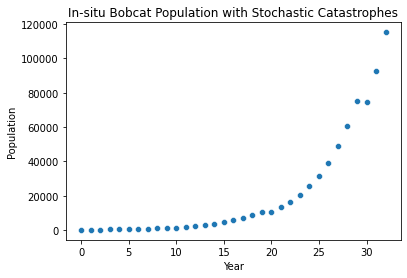

In [365]:
data_nth_population_extended_in_situ_stochastic = growth_stochastic_catastrophe(leslie_matrix=leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_extended_in_situ_stochastic, x = "Year", y = "Population").set(title = "In-situ Bobcat Population with Stochastic Catastrophes")

### 